In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]


In [4]:
"""
1. X의 형태를 변환하여 train_X에 저장합니다.
"""
train_X = pd.DataFrame(X, columns=['X']) # 2차원

"""
2. Y의 형태를 변환하여 train_Y에 저장합니다.
"""
train_Y = pd.Series(Y) # 1차원

# 변환된 데이터를 출력합니다.
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))


전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


In [5]:
# 모델 초기화

lrmodel = LinearRegression()

# train data, test data 구분, train data 로 학습

lrmodel.fit(train_X, train_Y)

LinearRegression()

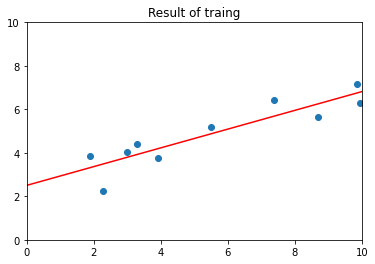

In [15]:
# 학습한 결과 시각화

plt.scatter(X,Y) # 산점도
plt.plot([0, 10], [lrmodel.intercept_, 10*lrmodel.coef_[0]+lrmodel.intercept_], c = 'r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Result of traing')
plt.savefig('traing.png')
plt.show()

In [13]:
lrmodel.coef_ # 계수

array([0.43078118])

In [14]:
lrmodel.coef_[0]

0.4307811787648283

In [9]:
lrmodel.intercept_  # beta 값, 상수

2.5061811708934925

In [16]:
beta_0 = lrmodel.intercept_  # beta 값, 상수
beta_1 = lrmodel.coef_[0]    # 계수값 (weight : 기울기, 가중치)

In [18]:
print(beta_0)
print(beta_1)

2.5061811708934925
0.4307811787648283


#### 단순선형회귀 예측

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = pd.DataFrame(X, columns=['X'])
train_Y = pd.Series(Y)

In [21]:
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

LinearRegression()

In [23]:
# train_X의 예측
pred_X = lrmodel.predict(train_X)

print('train_X 예측값 : \n{}\n'.format(pred_X))
print('실제값: \n{}\n'.format(train_Y))

train_X 예측값 : 
[6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749]

실제값: 
0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64

